In [43]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("main.csv")


In [36]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

## Poster_Link: Ссылка на постер фильма.
## Series_Title: Название сериала или фильма.
## Released_Year: Год выпуска.
## Certificate: Сертификация (PG, PG-13, R и т. д.).
## Runtime: Продолжительность фильма в минутах.
## Genre: Жанр фильма (драма, комедия, триллер и т. д.).
## IMDB_Rating: Рейтинг фильма на IMDb.
## Overview: Краткое описание сюжета фильма.
## Meta_score: Рейтинг фильма на сайте Metacritic.
## Director: Режиссер фильма.
## Star1, Star2, Star3, Star4: Основные актеры (первая, вторая, третья и четвертая звезда).
## No_of_Votes: Количество голосов на IMDb.
## Gross: Сборы фильма.

In [29]:
df.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


In [146]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

# Подготовка данных к кластеризации

In [44]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = df['Gross'].astype(float)

In [45]:
scaler = StandardScaler()
data_scaled = df.copy()
columns_to_scale = ['Meta_score','No_of_Votes','Gross']
for column in columns_to_scale:
    data_scaled[column] = scaler.fit_transform(df[[column]])

data_scaled = pd.DataFrame(data_scaled, columns=df.columns)

In [53]:
meann=df['Meta_score'].mean()
data_scaled['Meta_score'].fillna(meann,inplace=True)

In [54]:
meann=df['Gross'].mean()
data_scaled['Gross'].fillna(meann,inplace=True)

In [48]:
data_scaled =df.drop(columns=['Certificate','Poster_Link'])

In [49]:
label_encoders = {}
for column in data_scaled.columns:
    if data_scaled[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        data_scaled[column] = label_encoders[column].fit_transform(data_scaled[column])

In [55]:
data_scaled.isnull().sum()

Series_Title     0
Released_Year    0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

# Кластеризация

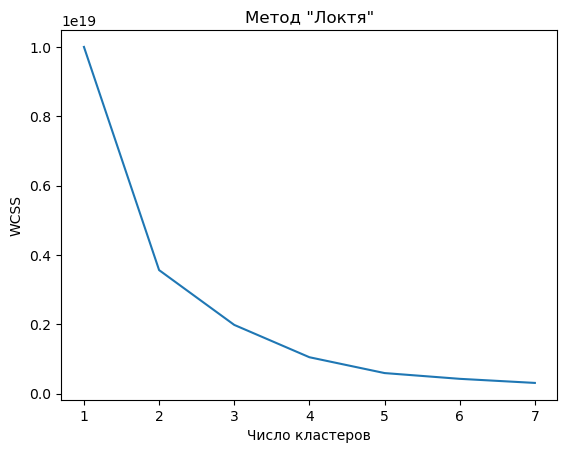

In [56]:
wcss=[]
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('Метод "Локтя"')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.show()

# можем выделить три кластера

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


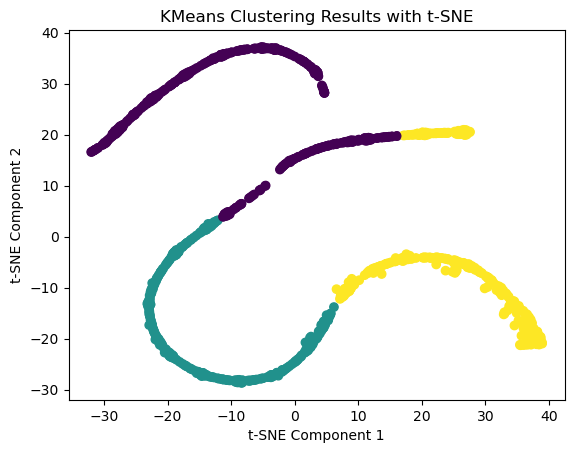

In [57]:
tsne = TSNE(n_components=2, random_state=42,learning_rate='auto')
tsne_components = tsne.fit_transform(data_scaled)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(tsne_components)
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("KMeans Clustering Results with t-SNE")
plt.show()

# а что дальше?

# Content-based recommendation system + поиск по ключевому слову

In [79]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [80]:
def preprocess_text(text):
    return str(text).lower()

In [81]:
def preprocess_data(df):
    for col in ['Genre','Star1', 'Star2', 'Star3', 'Star4', 'Overview']:
        df[col] = df[col].apply(preprocess_text)
    return df

In [82]:
def create_tfidf_matrix(df):
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['Genre'] + ' ' + df['Star1'] + ' ' + df['Star2'] + ' ' + df['Star3'] + ' ' + df['Star4'] + ' ' + df['Overview'])
    return tfidf, tfidf_matrix

In [83]:
def train_knn_model(tfidf_matrix):
    knn_model = NearestNeighbors(n_neighbors=10, metric='cosine')
    knn_model.fit(tfidf_matrix)
    return knn_model

In [84]:
def get_similar_movies_recommendations(movie_title, df, tfidf, knn_model):
    movie_index = df[df['Series_Title'] == movie_title].index[0]
    distances, indices = knn_model.kneighbors(tfidf.transform([df.iloc[movie_index]['Overview']]))
    similar_movies = df.iloc[indices.flatten()]
    return similar_movies[['Series_Title', 'Overview']]


In [85]:
def get_genre_recommendations(genre, df):
    genre_movies = df[df['Genre'].str.contains(genre, case=False)]
    return genre_movies[['Series_Title', 'Overview']]

In [86]:
def get_keyword_recommendations(keyword, df):
    keyword_movies = df[df['Overview'].str.contains(keyword, case=False)]
    return keyword_movies[['Series_Title', 'Overview']]

In [87]:
def get_star_recommendations(star, df):
    star_movies = df[(df['Star1'].str.contains(star, case=False)) |
                     (df['Star2'].str.contains(star, case=False)) |
                     (df['Star3'].str.contains(star, case=False)) |
                     (df['Star4'].str.contains(star, case=False))]
    return star_movies[['Series_Title', 'Overview']]


In [88]:
def choose_recommendation_method():
    print("Выберите метод получения рекомендаций:")
    print("1. По похожести фильмов")
    print("2. По жанру")
    print("3. По ключевому слову")
    print("4. По звезде (актеру)")
    choice = input("Введите номер метода: ")
    return choice  

In [89]:
def get_input_data(method):
    if method == '1':  
        movie_title = input("Введите название фильма: ")
        return movie_title
    elif method == '2':  
        genre = input("Введите жанр: ")
        return genre
    elif method == '3':  
        keyword = input("Введите ключевое слово: ")
        return keyword
    elif method == '4':  
        star = input("Введите имя звезды (актера): ")
        return star


In [90]:
tfidf, tfidf_matrix = create_tfidf_matrix(df)
knn_model = train_knn_model(tfidf_matrix)

method = choose_recommendation_method()

input_data = get_input_data(method)
def get_recommendations(method, input_data, df, tfidf, knn_model):
    if method == '1':
        return get_similar_movies_recommendations(input_data, df, tfidf, knn_model)
    elif method == '2':
        return get_genre_recommendations(input_data, df)
    elif method == '3':
        return get_keyword_recommendations(input_data, df)
    elif method == '4':
        return get_star_recommendations(input_data, df)
    else:
        print("Неправильно выбран метод получения рекомендаций.")
        return None

recommendations = get_recommendations(method, input_data, df, tfidf, knn_model)

if recommendations is not None:
    if not recommendations.empty:
        print("Рекомендации:")
        print(f"{'Параметр':<20} {'Название фильма':<50} {'Описание':<100}")
        for index, row in recommendations[['Series_Title', 'Overview']].head(7).iterrows():
            print(f"{input_data:<20} {row['Series_Title']:<50} {row['Overview']:<100}")
    else:
        print("К сожалению, нет рекомендаций по указанным критериям.")
else:
    print("Неправильно выбран метод получения рекомендаций.")

Выберите метод получения рекомендаций:
1. По похожести фильмов
2. По жанру
3. По ключевому слову
4. По звезде (актеру)


Введите номер метода:  2
Введите жанр:  horror


Рекомендации:
Параметр             Название фильма                                    Описание                                                                                            
horror               Psycho                                             A Phoenix secretary embezzles $40,000 from her employer's client, goes on the run, and checks into a remote motel run by a young man under the domination of his mother.
horror               The Shining                                        A family heads to an isolated hotel for the winter where a sinister presence influences the father into violence, while his psychic son sees horrific forebodings from both past and future.
horror               Alien                                              After a space merchant vessel receives an unknown transmission as a distress call, one of the crew is attacked by a mysterious life form and they soon realize that its life cycle has merely begun.
horror               Tumbbad              